<a href="https://colab.research.google.com/github/youyou2425/machine-learning-projects/blob/main/Cervical_Cancer_Prediction_Using_XG_boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [27]:
# import the csv files using pandas
cervical_cancer_df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Cervical cancer prediction/cervical_cancer.csv")
# (int) Age
# (int) Number of sexual partners
#  (int) First sexual intercourse (age)
# (int) Num of pregnancies
# (bool) Smokes
# (bool) Smokes (years)
# (bool) Smokes (packs/year)
# (bool) Hormonal Contraceptives
# (int) Hormonal Contraceptives (years)
# (bool) IUD ("IUD" stands for "intrauterine device" and used for birth control
# (int) IUD (years)
# (bool) STDs (Sexually transmitted disease)
# (int) STDs (number)
# (bool) STDs:condylomatosis
# (bool) STDs:cervical condylomatosis
# (bool) STDs:vaginal condylomatosis
# (bool) STDs:vulvo-perineal condylomatosis
# (bool) STDs:syphilis
# (bool) STDs:pelvic inflammatory disease
# (bool) STDs:genital herpes
# (bool) STDs:molluscum contagiosum
# (bool) STDs:AIDS
# (bool) STDs:HIV
# (bool) STDs:Hepatitis B
# (bool) STDs:HPV
# (int) STDs: Number of diagnosis
# (int) STDs: Time since first diagnosis
# (int) STDs: Time since last diagnosis
# (bool) Dx:Cancer
# (bool) Dx:CIN
# (bool) Dx:HPV
# (bool) Dx
# (bool) Hinselmann: target variable - A colposcopy is a procedure in which doctors examine the cervix.
# (bool) Schiller: target variable - Schiller's Iodine test is used for cervical cancer diagnosis
# (bool) Cytology: target variable - Cytology is the exam of a single cell type used for cancer screening.
# (bool) Biopsy: target variable - Biopsy is performed by removing a piece of tissue and examine it under microscope,
# Biopsy is the main way doctors diagnose most types of cancer.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Let's explore the dataframe
cervical_cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
cervical_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
# Get the statistics of the data frame
cervical_cancer_df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Notice many question marks indicating missing values

In [28]:
# replace '?' with NaN
cervical_cancer_df=cervical_cancer_df.replace('?',np.nan) #so that isnull(), heatmapcan be used

In [ ]:
cervical_cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
cervical_cancer_df.isnull().sum()  #number of missing values

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

<Axes: >

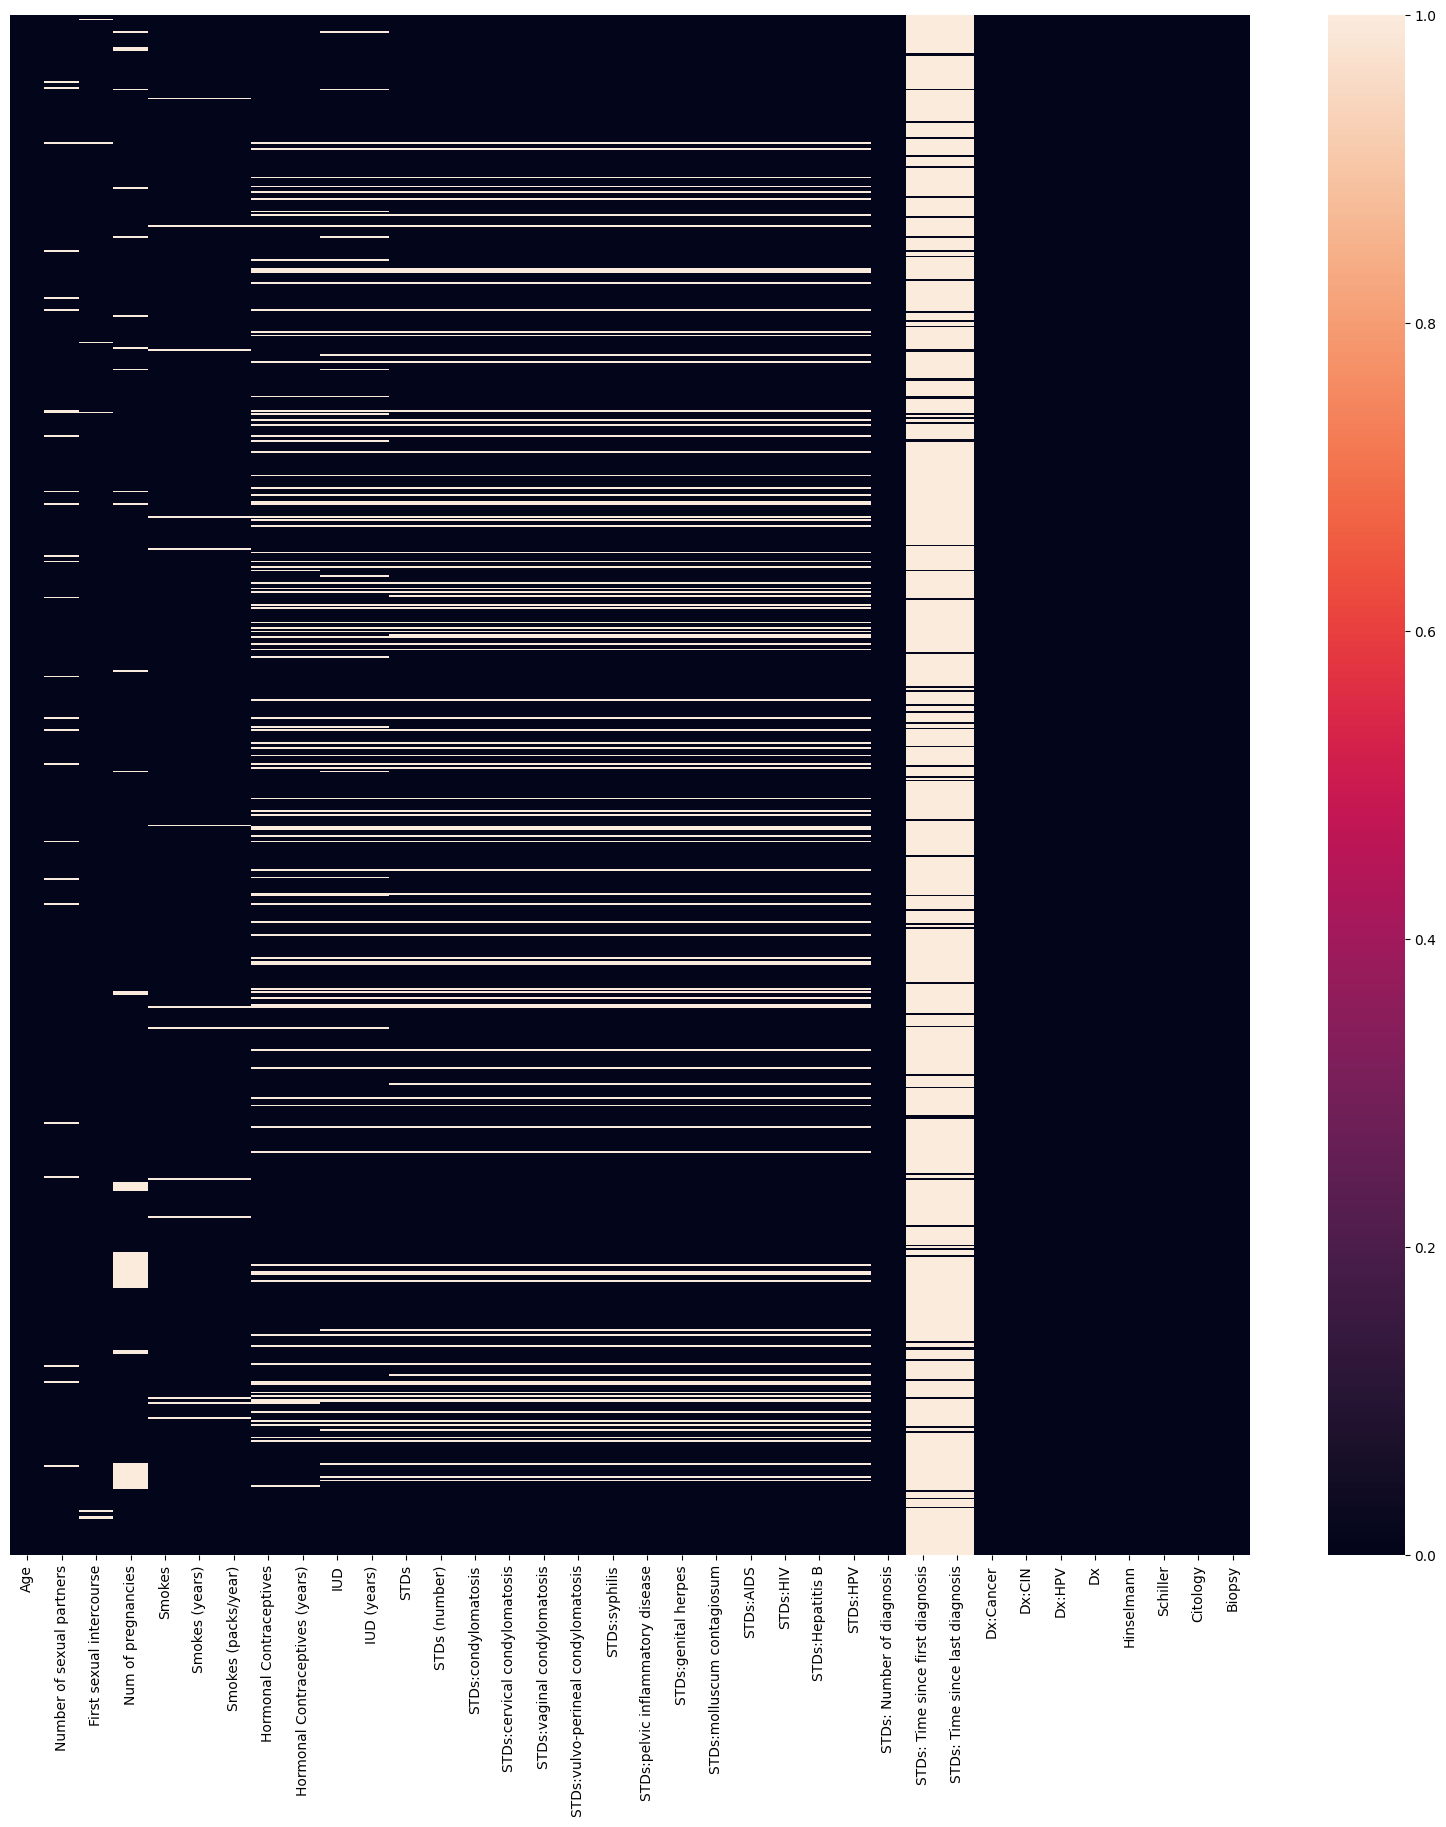

In [ ]:
# Plot heatmap
plt.figure(figsize=(20,20))
sns.heatmap(cervical_cancer_df.isnull(), yticklabels=False)

In [ ]:
# Get data frame info
cervical_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [29]:
# Since STDs: Time since first diagnosis  and STDs: Time since last diagnosis have more than 80% missing values
# we can drop them
cervical_cancer_df=cervical_cancer_df.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'])
cervical_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [30]:
# Since most of the column types are object, we are not able to get the statistics of the dataframe.
# Convert them to numeric type

cervical_cancer_df = cervical_cancer_df.apply(pd.to_numeric)
cervical_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [ ]:
# Get the statistics of the dataframe
cervical_cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.051503,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of sexual partners'}>,
        <Axes: title={'center': 'First sexual intercourse'}>,
        <Axes: title={'center': 'Num of pregnancies'}>,
        <Axes: title={'center': 'Smokes'}>,
        <Axes: title={'center': 'Smokes (years)'}>],
       [<Axes: title={'center': 'Smokes (packs/year)'}>,
        <Axes: title={'center': 'Hormonal Contraceptives'}>,
        <Axes: title={'center': 'Hormonal Contraceptives (years)'}>,
        <Axes: title={'center': 'IUD'}>,
        <Axes: title={'center': 'IUD (years)'}>,
        <Axes: title={'center': 'STDs'}>],
       [<Axes: title={'center': 'STDs (number)'}>,
        <Axes: title={'center': 'STDs:condylomatosis'}>,
        <Axes: title={'center': 'STDs:cervical condylomatosis'}>,
        <Axes: title={'center': 'STDs:vaginal condylomatosis'}>,
        <Axes: title={'center': 'STDs:vulvo-perineal condylomatosis'}>,
        <Axes: title={'center': 'STDs:syphilis'}>]

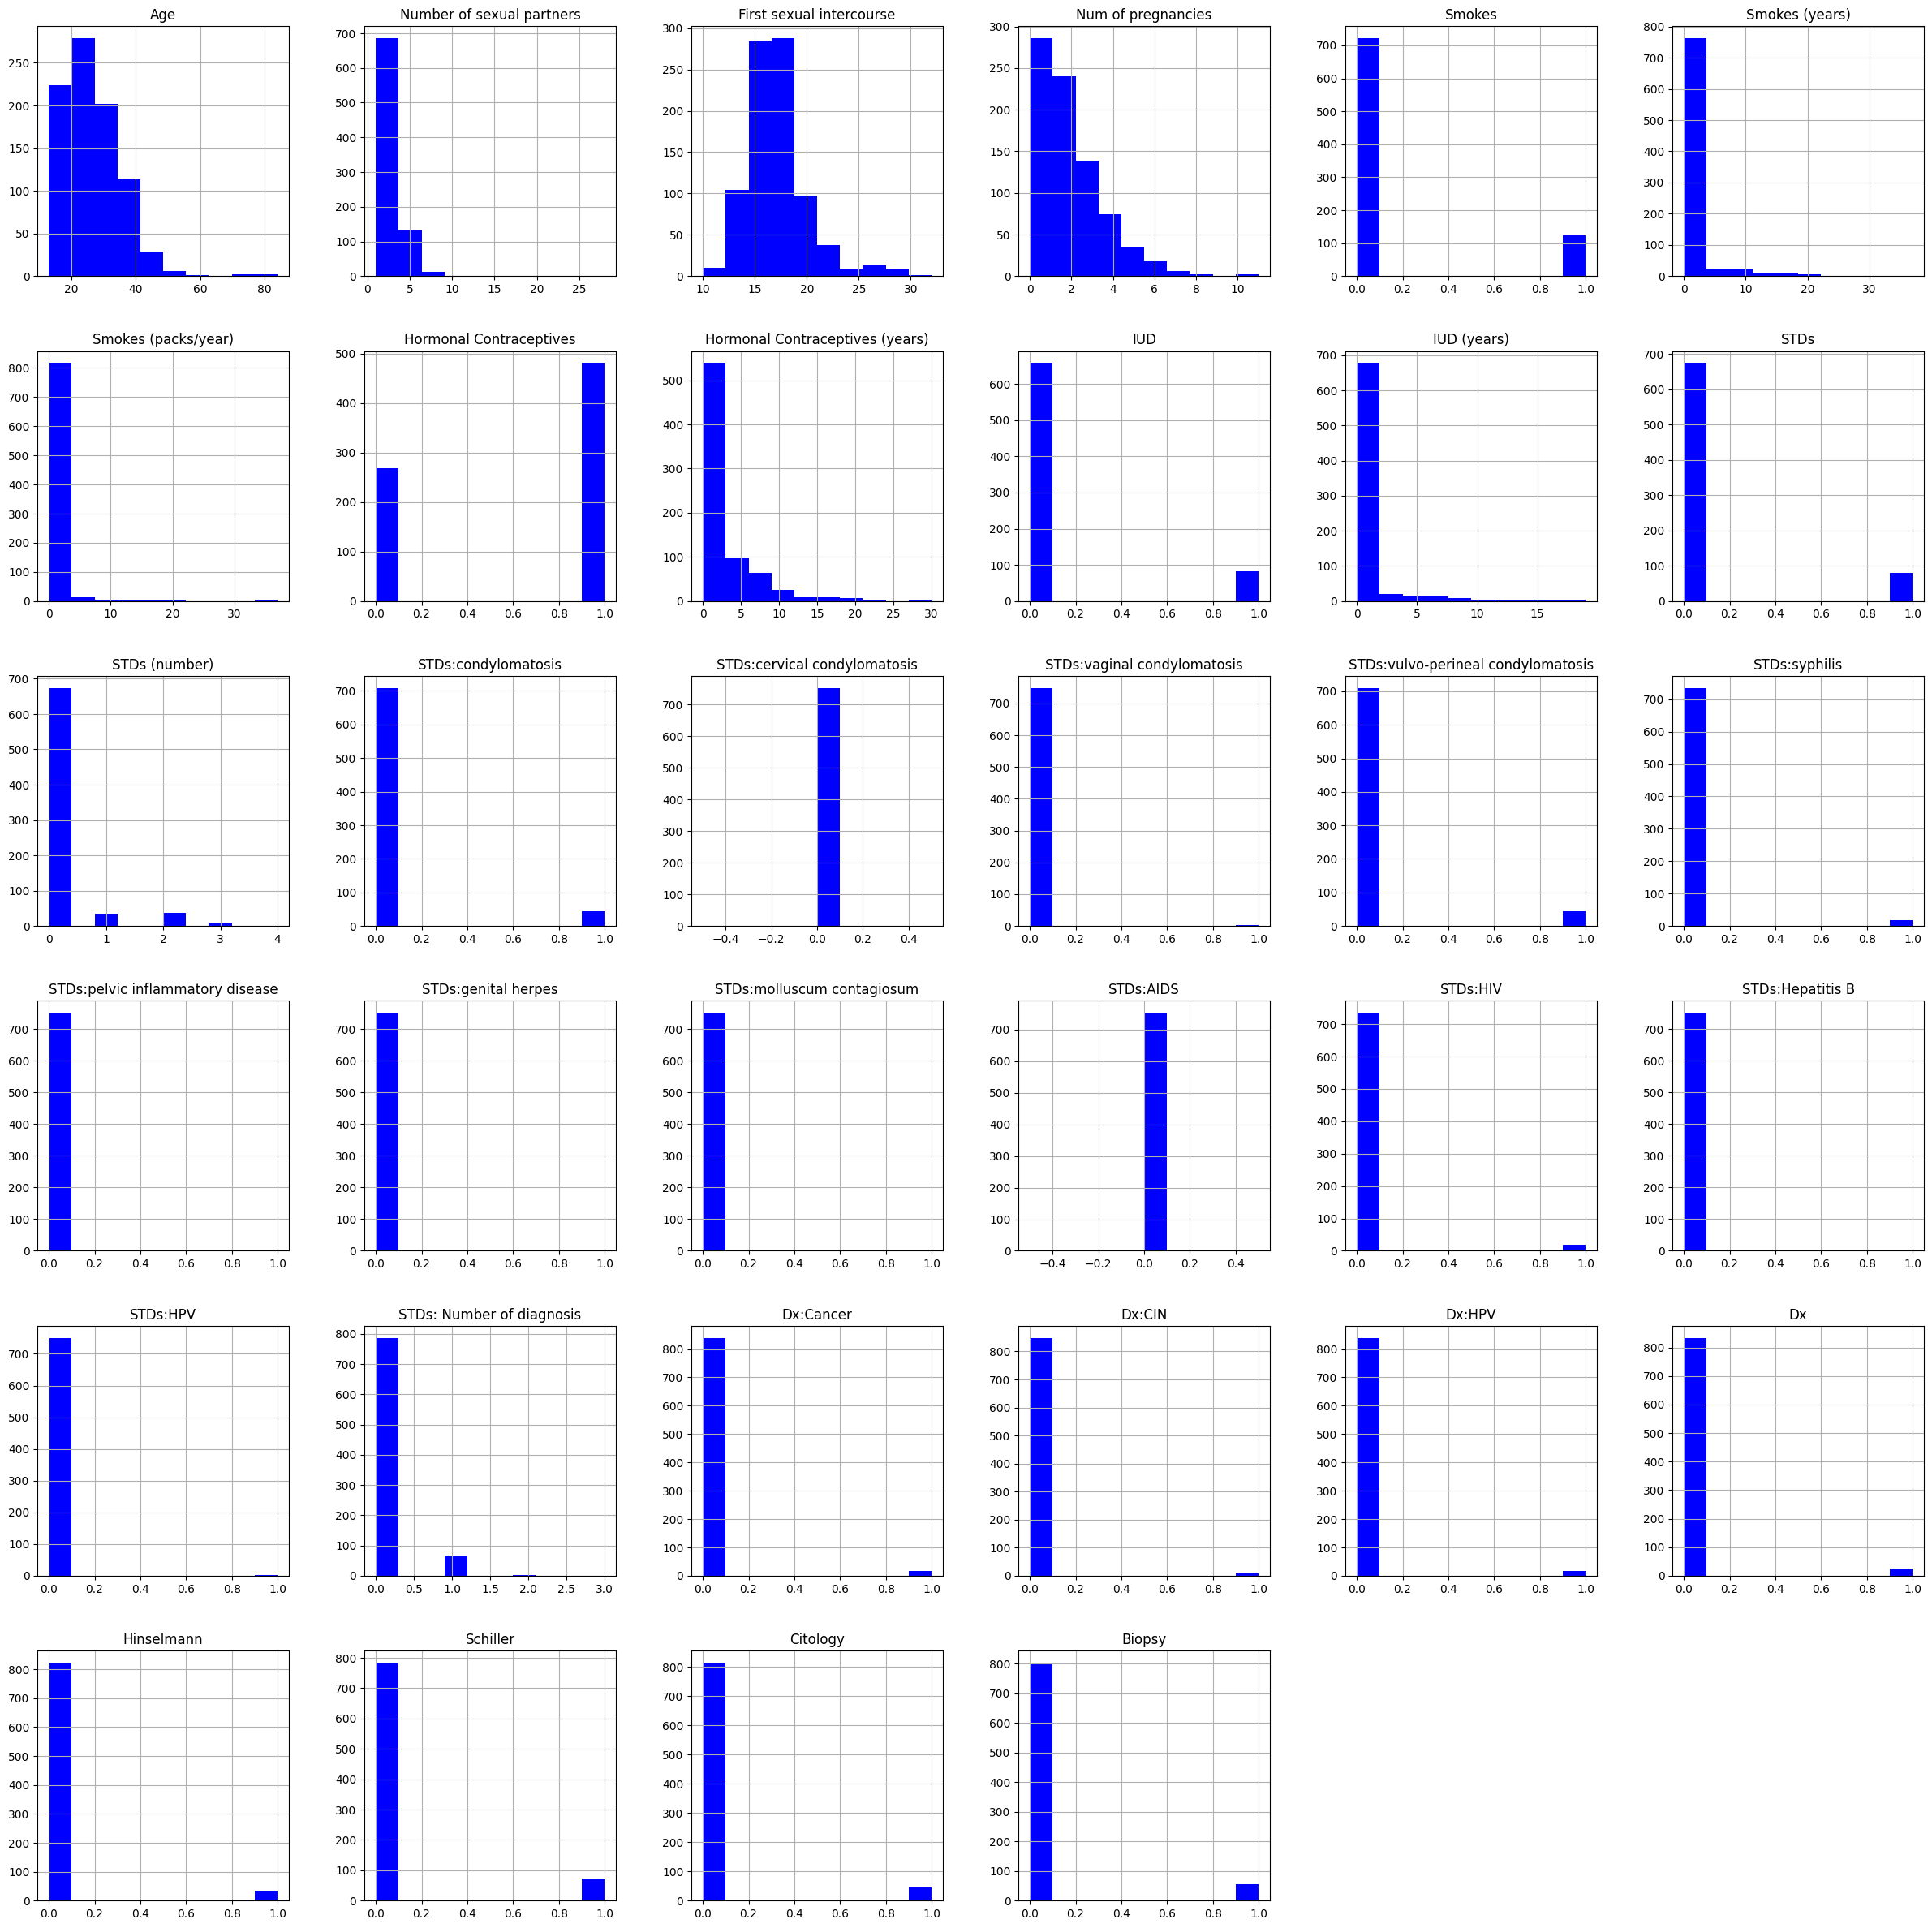

In [45]:
cervical_cancer_df.hist(bins=10, figsize=(30,30), color='b')

Looks like 6 columns have only 1 value, check frequencies

In [31]:
STD_columns=[col for col in cervical_cancer_df.columns if col.startswith('STD')]
STD_columns

['STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis']

In [47]:
for col in STD_columns:
    print(cervical_cancer_df[col].value_counts())

STDs
0.0    674
1.0     79
Name: count, dtype: int64
STDs (number)
0.0    674
2.0     37
1.0     34
3.0      7
4.0      1
Name: count, dtype: int64
STDs:condylomatosis
0.0    709
1.0     44
Name: count, dtype: int64
STDs:cervical condylomatosis
0.0    753
Name: count, dtype: int64
STDs:vaginal condylomatosis
0.0    749
1.0      4
Name: count, dtype: int64
STDs:vulvo-perineal condylomatosis
0.0    710
1.0     43
Name: count, dtype: int64
STDs:syphilis
0.0    735
1.0     18
Name: count, dtype: int64
STDs:pelvic inflammatory disease
0.0    752
1.0      1
Name: count, dtype: int64
STDs:genital herpes
0.0    752
1.0      1
Name: count, dtype: int64
STDs:molluscum contagiosum
0.0    752
1.0      1
Name: count, dtype: int64
STDs:AIDS
0.0    753
Name: count, dtype: int64
STDs:HIV
0.0    735
1.0     18
Name: count, dtype: int64
STDs:Hepatitis B
0.0    752
1.0      1
Name: count, dtype: int64
STDs:HPV
0.0    751
1.0      2
Name: count, dtype: int64
STDs: Number of diagnosis
0    787
1     68
2  

Two columns only have value of 0, not providing any information, should be dropped

In [32]:
cervical_cancer_df.drop(columns=['STDs:AIDS','STDs:cervical condylomatosis'], inplace=True)
cervical_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [33]:
STD_columns=[col for col in cervical_cancer_df.columns if col.startswith('STD')]
STD_columns

['STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis']

In [34]:
# Replace null values with 0 (most frequent in the dataset) for STD flags
cervical_cancer_df[STD_columns] = cervical_cancer_df[STD_columns].fillna(0)

In [35]:
# Replace null values with 0 for other dummy variables
cervical_cancer_df['Smokes']=cervical_cancer_df['Smokes'].fillna(0)
cervical_cancer_df['Hormonal Contraceptives']=cervical_cancer_df['Hormonal Contraceptives'].fillna(0)
cervical_cancer_df['IUD']=cervical_cancer_df['IUD'].fillna(0)

In [36]:
# Replace null values with median for continuous variables
cont_col=['Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)']
cervical_cancer_df[cont_col]=cervical_cancer_df[cont_col].fillna(cervical_cancer_df.median())

In [60]:
cervical_cancer_df.isnull().sum()

,0
Age,0
Number of sexual partners,0
First sexual intercourse,0
Num of pregnancies,0
Smokes,0
Smokes (years),0
Smokes (packs/year),0
Hormonal Contraceptives,0
Hormonal Contraceptives (years),0
IUD,0


<Axes: >

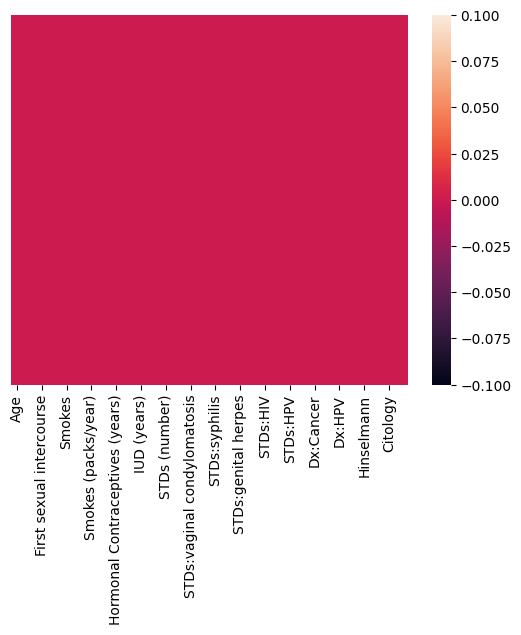

In [61]:
# Nan heatmap
sns.heatmap(cervical_cancer_df.isnull(), yticklabels=False)

In [62]:
# Get the correlation matrix
cervical_cancer_df.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.085971,0.369175,0.525892,0.057204,0.218261,0.131861,0.116499,0.295267,0.279429,...,0.040861,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.085971,1.000000,-0.145847,0.077439,0.236858,0.175729,0.174968,0.011277,0.021188,0.032460,...,0.014360,0.053056,0.023699,0.016669,0.028646,0.024597,-0.039098,-0.007230,0.024067,-0.000408
First sexual intercourse,0.369175,-0.145847,1.000000,-0.056374,-0.123280,-0.058207,-0.056232,0.061642,0.025071,-0.010758,...,0.034728,-0.013331,0.067281,-0.032628,0.043964,0.035748,-0.016549,0.003489,-0.010974,0.007259
Num of pregnancies,0.525892,0.077439,-0.056374,1.000000,0.081517,0.175832,0.096976,0.161186,0.218805,0.204501,...,-0.026153,0.034912,0.036962,-0.002600,0.048578,0.014227,0.037809,0.085810,-0.027675,0.040215
Smokes,0.057204,0.236858,-0.123280,0.081517,1.000000,0.723572,0.493843,-0.006397,0.041979,-0.055115,...,0.049193,0.090725,-0.013470,-0.042119,0.009737,-0.069396,0.033333,0.052028,-0.004639,0.028724
Smokes (years),0.218261,0.175729,-0.058207,0.175832,0.723572,1.000000,0.724320,-0.000290,0.052006,0.027492,...,0.051201,0.078303,0.052859,-0.030476,0.055398,-0.050213,0.070352,0.093479,-0.007275,0.061204
Smokes (packs/year),0.131861,0.174968,-0.056232,0.096976,0.493843,0.724320,1.000000,0.014806,0.043262,0.008226,...,-0.008015,0.029912,0.107229,-0.020800,0.109118,-0.034270,0.026086,0.017200,0.004250,0.024487
Hormonal Contraceptives,0.116499,0.011277,0.061642,0.161186,-0.006397,-0.000290,0.014806,1.000000,0.469879,0.083174,...,0.042793,-0.023652,0.047668,-0.001048,0.047668,0.007768,0.063855,0.046135,0.014195,0.049535
Hormonal Contraceptives (years),0.295267,0.021188,0.025071,0.218805,0.041979,0.052006,0.043262,0.469879,1.000000,0.110677,...,0.053756,-0.028285,0.062971,0.003793,0.065640,-0.009136,0.051093,0.096702,0.082537,0.094164
IUD,0.279429,0.032460,-0.010758,0.204501,-0.055115,0.027492,0.008226,0.083174,0.110677,1.000000,...,-0.015819,0.035791,0.117166,0.043708,0.062142,0.135778,0.052108,0.096089,0.013292,0.059231


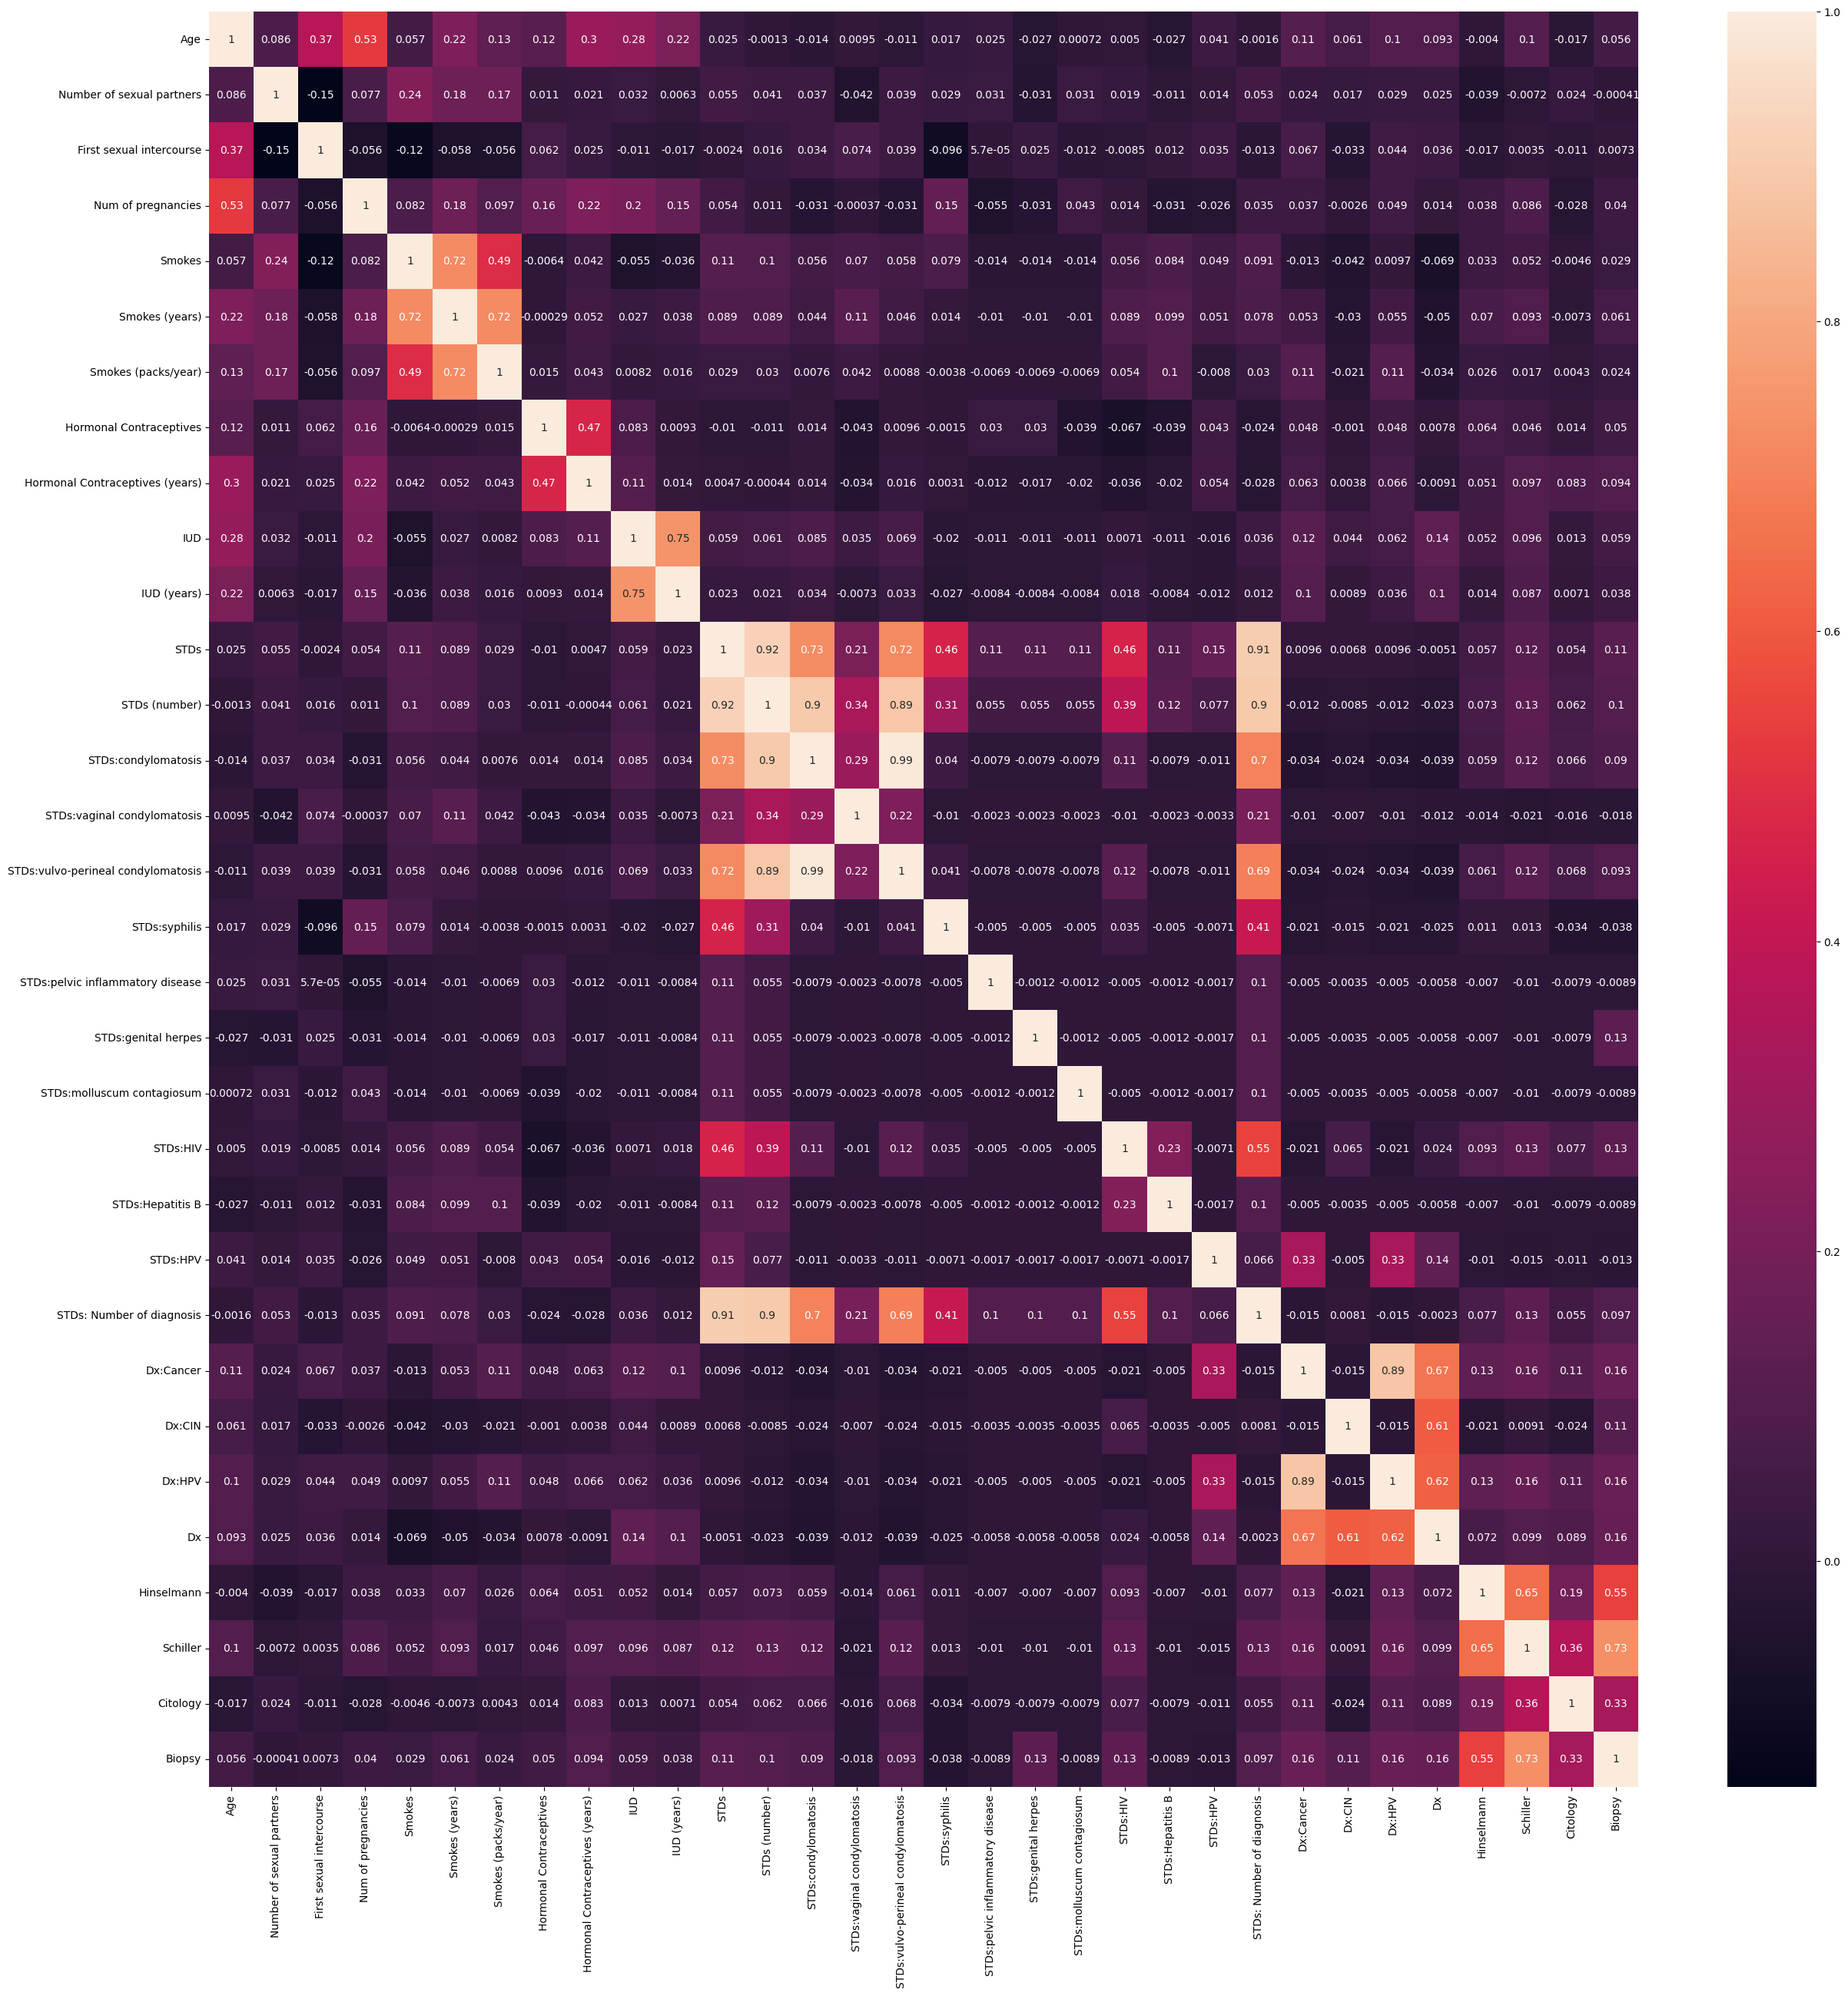

In [63]:
# Plot the correlation matrix
plt.figure(figsize=(30,30))
sns.heatmap(cervical_cancer_df.corr(), annot=True)
plt.show()

In [65]:
# For tree-based models, correlation is less of an issue, remove one of the variables when correlation>0.9
corr_matrix = cervical_cancer_df.corr()
np.fill_diagonal(corr_matrix.values, 0)
high_corr_mask = np.abs(corr_matrix) > 0.9
high_corr_pairs = corr_matrix[high_corr_mask].stack().reset_index()
high_corr_pairs.columns = ['feature1', 'feature2', 'correlation']
high_corr_pairs

,feature1,feature2,correlation
0,STDs,STDs (number),0.919625
1,STDs,STDs: Number of diagnosis,0.907805
2,STDs (number),STDs,0.919625
3,STDs (number),STDs:condylomatosis,0.900245
4,STDs:condylomatosis,STDs (number),0.900245
5,STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,0.987964
6,STDs:vulvo-perineal condylomatosis,STDs:condylomatosis,0.987964
7,STDs: Number of diagnosis,STDs,0.907805


In [37]:
cervical_cancer_df1=cervical_cancer_df.drop(columns=['STDs (number)','STDs: Number of diagnosis','STDs:vulvo-perineal condylomatosis'])
cervical_cancer_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               858 non-null    int64  
 1   Number of sexual partners         858 non-null    float64
 2   First sexual intercourse          858 non-null    float64
 3   Num of pregnancies                858 non-null    float64
 4   Smokes                            858 non-null    float64
 5   Smokes (years)                    858 non-null    float64
 6   Smokes (packs/year)               858 non-null    float64
 7   Hormonal Contraceptives           858 non-null    float64
 8   Hormonal Contraceptives (years)   858 non-null    float64
 9   IUD                               858 non-null    float64
 10  IUD (years)                       858 non-null    float64
 11  STDs                              858 non-null    float64
 12  STDs:con

In [38]:
# check new dataframe to see if there is still correlation>0.9
corr_matrix = cervical_cancer_df1.corr()
np.fill_diagonal(corr_matrix.values, 0)
high_corr_mask = np.abs(corr_matrix) > 0.9
high_corr_pairs = corr_matrix[high_corr_mask].stack().reset_index()
high_corr_pairs.columns = ['feature1', 'feature2', 'correlation']
high_corr_pairs

,feature1,feature2,correlation


In [39]:
y=cervical_cancer_df1['Biopsy']
X=cervical_cancer_df1.drop(columns=['Biopsy'])

In [74]:
y.shape

(858,)

In [75]:
X.shape

(858, 28)

In [40]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [41]:
# scaling the data before feeding the model, MinMaxScaler works well for skewed data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
# NumPy provides a convenient way to save multiple arrays into a single compressed .npz
# save file to Google Drive using the savez_compressed function.
np.savez_compressed('/content/drive/MyDrive/Colab Notebooks/Cervical cancer prediction/cervical_cancer_arrays.npz',
                    X_train_scaled=X_train_scaled,
                    X_test_scaled=X_test_scaled,
                    X_train=X_train, y_train=y_train,
                    X_test=X_test, y_test=y_test)


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load from Google Drive (after mounting Drive)
data = np.load('/content/drive/MyDrive/Colab Notebooks/Cervical cancer prediction/cervical_cancer_arrays.npz', allow_pickle=True)

# Access the saved arrays using their names
X_train_scaled = data['X_train_scaled']
X_test_scaled = data['X_test_scaled']
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

Train and evaluate XGBoost classifier

In [4]:
# run this if use early stopping in XGBoost
!pip install --upgrade xgboost

In [ ]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
# Train an XGBoost classifier model
import xgboost as xgb

model = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=10, random_state=42)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [6]:
result_train=model.score(X_train_scaled, y_train) #accuracy of the training data
result_train

0.9650145772594753

In [7]:
# predict the score of the trained model using the testing dataset
result_test=model.score(X_test_scaled, y_test)
result_test

0.9534883720930233

In [8]:
# make predictions on the test data
y_predict=model.predict(X_test_scaled)

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
#When using classification_report(y_test, y_predict) from sklearn.metrics,
#the true values (y_test) should be the first parameter, and the predicted
#values (y_predict) should be the second parameter to ensure correct
#calculations on precision and recall
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       164
           1       0.50      0.12      0.20         8

    accuracy                           0.95       172
   macro avg       0.73      0.56      0.59       172
weighted avg       0.94      0.95      0.94       172



In [10]:
#Correct way to do confusion_matrix, true value first then predicted value
#so x axis is predicted value, y axis is true value
#lower left is false negative, upper right is false positive
#the result array values are arranged as follows:
#    True Negative (TN)    False Positive (FP)
#    False Negative (FN)   True Positive (TP)

confusion_matrix(y_test,y_predict)

array([[163,   1],
       [  7,   1]])

In [58]:
y_test.value_counts()

,count
Biopsy,
0,164
1,8


Both precision and recall matter in this project, because we don't want true cancer patients to miss treatments, and false positive people undergo expensive and painful unnecessary treatments. Precision of 0.5 means model is correct 50% of the time, recall of 0.12 means the model is missing 88% of actual cancer cases.

In [49]:
# training data prediction
y_train_predict=model.predict(X_train_scaled)
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       639
           1       0.93      0.53      0.68        47

    accuracy                           0.97       686
   macro avg       0.95      0.76      0.83       686
weighted avg       0.96      0.97      0.96       686



Training data has higher precision 0.93 and recall 0.53, big gap between training and testing performance, signs of overfitting.

Use SHAP to drop features with near-zero impact

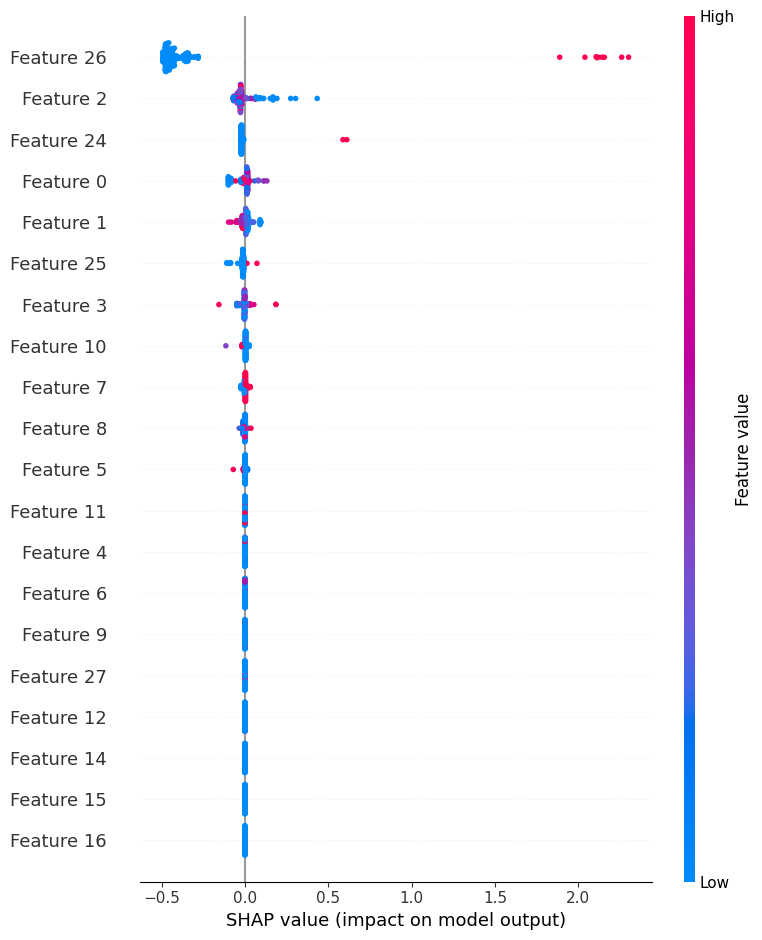

In [50]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test_scaled)

# Summary plot to see the most influential features
shap.summary_plot(shap_values, X_test_scaled)

In [59]:
plt.figure()  # Create a new figure
shap.summary_plot(shap_values, X_test_scaled, show=False)  # Disable automatic display
plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches="tight")  # Save as PNG
plt.close()  # Close the plot to prevent duplicate display

In [60]:
from google.colab import files
files.download('shap_summary_plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Schiller's iodine test and age have highest importance

In [51]:
cervical_cancer_df1['Schiller'].value_counts()

,count
Schiller,
0,784
1,74


Remove features 14, 15, 16, 12 and 27 that have SHAP values close to 0, meaning they have little influence on model predictions.

In [11]:
# List of column indices to remove
columns_to_remove = [14, 15, 16, 12, 27]

# Remove columns from X_train
X_train_reduced = np.delete(X_train_scaled, columns_to_remove, axis=1)
X_test_reduced = np.delete(X_test_scaled, columns_to_remove, axis=1)

In [13]:
X_train_reduced.shape

(686, 23)

In [14]:
X_test_reduced.shape

(172, 23)

In [15]:
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=10, random_state=42)
model.fit(X_train_reduced, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [16]:
# testing data prediction
y_predict=model.predict(X_test_reduced)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       164
           1       0.50      0.12      0.20         8

    accuracy                           0.95       172
   macro avg       0.73      0.56      0.59       172
weighted avg       0.94      0.95      0.94       172



In [17]:
# training data prediction
y_train_predict=model.predict(X_train_reduced)
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       639
           1       0.93      0.53      0.68        47

    accuracy                           0.97       686
   macro avg       0.95      0.76      0.83       686
weighted avg       0.96      0.97      0.96       686



Same results as before, Confirming those features with no influence were useless noise, removing them reduced complexityand improved training efficiency

Use early stopping to prevent overfitting

In [18]:
n = int(len(X_train)*0.8) #use 80% to train and 20% to eval
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train_reduced[:n], X_train_reduced[n:], y_train[:n], y_train[n:]

In [36]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1,
                          verbosity=1,
                          early_stopping_rounds=10,
                          random_state=0) #verbosity=1 is default, showing warnings and basic training info

# Fit the model with early stopping
xgb_model.fit(X_train_fit, y_train_fit,
              eval_set=[(X_train_eval, y_train_eval)],
              verbose=True
              )

# Get the best number of trees
best_n_trees = xgb_model.best_iteration
print(f"Best number of trees: {best_n_trees}")

[0]	validation_0-logloss:0.30438
[1]	validation_0-logloss:0.27894
[2]	validation_0-logloss:0.25892
[3]	validation_0-logloss:0.24095
[4]	validation_0-logloss:0.22607
[5]	validation_0-logloss:0.21369
[6]	validation_0-logloss:0.20387
[7]	validation_0-logloss:0.19404
[8]	validation_0-logloss:0.18580
[9]	validation_0-logloss:0.17959
[10]	validation_0-logloss:0.17428
[11]	validation_0-logloss:0.17009
[12]	validation_0-logloss:0.16531
[13]	validation_0-logloss:0.16145
[14]	validation_0-logloss:0.15906
[15]	validation_0-logloss:0.15732
[16]	validation_0-logloss:0.15487
[17]	validation_0-logloss:0.15397
[18]	validation_0-logloss:0.15205
[19]	validation_0-logloss:0.15079
[20]	validation_0-logloss:0.15032
[21]	validation_0-logloss:0.15043
[22]	validation_0-logloss:0.15039
[23]	validation_0-logloss:0.15020
[24]	validation_0-logloss:0.14945
[25]	validation_0-logloss:0.14968
[26]	validation_0-logloss:0.15045
[27]	validation_0-logloss:0.15050
[28]	validation_0-logloss:0.15083
[29]	validation_0-loglos

In [38]:
import joblib

# Save the trained model
joblib.dump(xgb_model, "/content/drive/My Drive/Colab Notebooks/Cervical cancer prediction/best_xgboost_model.pkl")

['/content/drive/My Drive/Colab Notebooks/Cervical cancer prediction/best_xgboost_model.pkl']

In [39]:
import joblib

# Load the model from the Colab environment's file path
best_model = joblib.load("/content/drive/My Drive/Colab Notebooks/Cervical cancer prediction/best_xgboost_model.pkl")

# Check the loaded model
print(best_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)


In [40]:
# For predictions, optionally specify ntree_limit:
xgb_pred = xgb_model.predict(X_test_reduced, iteration_range=(0, best_n_trees))

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

[[161   3]
 [  5   3]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       164
           1       0.50      0.38      0.43         8

    accuracy                           0.95       172
   macro avg       0.73      0.68      0.70       172
weighted avg       0.95      0.95      0.95       172



In [41]:
xgb_train_pred = xgb_model.predict(X_train_reduced, iteration_range=(0, best_n_trees))
print(confusion_matrix(y_train, xgb_train_pred))
print(classification_report(y_train, xgb_train_pred))

[[633   6]
 [ 12  35]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       639
           1       0.85      0.74      0.80        47

    accuracy                           0.97       686
   macro avg       0.92      0.87      0.89       686
weighted avg       0.97      0.97      0.97       686



Tune classification threshold

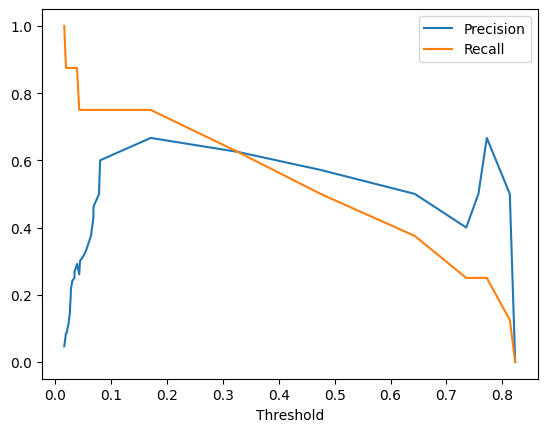

<Figure size 640x480 with 0 Axes>

In [43]:
from sklearn.metrics import precision_recall_curve

y_probs = xgb_model.predict_proba(X_test_reduced, iteration_range=(0, best_n_trees))[:, 1]  # Get probabilities for class 1
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Plot precision-recall tradeoff to choose a better threshold
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()

plt.savefig('precision recall threshold.png')

In [45]:
from google.colab import files
files.download('precision recall threshold.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# Choose an optimal threshold (manually based on the plot or programmatically)
optimal_threshold = thresholds[np.argmax(recalls * precisions)]  # Example: Maximize F1 score

# Convert probabilities to binary predictions using the chosen threshold
y_pred_adjusted = (y_probs >= optimal_threshold).astype(int)

# Print the selected threshold
print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.17071852087974548


In [24]:
print(confusion_matrix(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

[[161   3]
 [  2   6]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       164
           1       0.67      0.75      0.71         8

    accuracy                           0.97       172
   macro avg       0.83      0.87      0.85       172
weighted avg       0.97      0.97      0.97       172



In [25]:
y_train_probs = xgb_model.predict_proba(X_train_reduced, iteration_range=(0, best_n_trees))[:, 1]
y_train_pred_adjusted = (y_train_probs >= optimal_threshold).astype(int)

print(confusion_matrix(y_train, y_train_pred_adjusted))
print(classification_report(y_train, y_train_pred_adjusted))

[[620  19]
 [  5  42]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       639
           1       0.69      0.89      0.78        47

    accuracy                           0.97       686
   macro avg       0.84      0.93      0.88       686
weighted avg       0.97      0.97      0.97       686



Positive cases are only 5-6%, highly imbalanced. This can bias model towards predicting more negatives and lowering recall and overestimated accuracy

In [26]:
unique_elements, counts = np.unique(y_train, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

0: 639
1: 47


In [27]:
unique_elements, counts = np.unique(y_test, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

0: 164
1: 8


Balancing class weights with scale_pos_weight

In [29]:
xgb_model = XGBClassifier(n_estimators=24, learning_rate=0.1,
                          scale_pos_weight=15,  # Adjusted for class imbalance
                          verbosity=1,
                          early_stopping_rounds=10,
                          random_state=0)

xgb_model.fit(X_train_fit, y_train_fit,
              eval_set=[(X_train_eval, y_train_eval)],
              verbose=True)

best_n_trees = xgb_model.best_iteration
print(f"Best number of trees: {best_n_trees}")

[0]	validation_0-logloss:0.60058
[1]	validation_0-logloss:0.53767
[2]	validation_0-logloss:0.48575
[3]	validation_0-logloss:0.44338
[4]	validation_0-logloss:0.40723
[5]	validation_0-logloss:0.37667
[6]	validation_0-logloss:0.34880
[7]	validation_0-logloss:0.32641
[8]	validation_0-logloss:0.30449
[9]	validation_0-logloss:0.28659
[10]	validation_0-logloss:0.27012
[11]	validation_0-logloss:0.25692
[12]	validation_0-logloss:0.24461
[13]	validation_0-logloss:0.23456
[14]	validation_0-logloss:0.22601
[15]	validation_0-logloss:0.21827
[16]	validation_0-logloss:0.21167
[17]	validation_0-logloss:0.20620
[18]	validation_0-logloss:0.20064
[19]	validation_0-logloss:0.19644
[20]	validation_0-logloss:0.19258
[21]	validation_0-logloss:0.18927
[22]	validation_0-logloss:0.18666
[23]	validation_0-logloss:0.18454
Best number of trees: 23


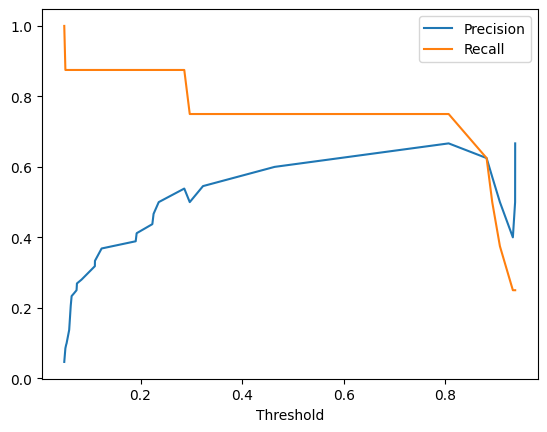

<Figure size 640x480 with 0 Axes>

In [32]:
from sklearn.metrics import precision_recall_curve

y_probs = xgb_model.predict_proba(X_test_reduced, iteration_range=(0, best_n_trees))[:, 1]  # Get probabilities for class 1
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Plot precision-recall tradeoff to choose a better threshold
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()

plt.savefig('precision recall threshold balance.png')

In [33]:
# Choose an optimal threshold (manually based on the plot or programmatically)
optimal_threshold = thresholds[np.argmax(recalls * precisions)]  # Example: Maximize F1 score

# Convert probabilities to binary predictions using the chosen threshold
y_pred_adjusted = (y_probs >= optimal_threshold).astype(int)

# Print the selected threshold
print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.8067251443862915


In [34]:
print(confusion_matrix(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

[[161   3]
 [  2   6]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       164
           1       0.67      0.75      0.71         8

    accuracy                           0.97       172
   macro avg       0.83      0.87      0.85       172
weighted avg       0.97      0.97      0.97       172



In [35]:
y_train_probs = xgb_model.predict_proba(X_train_reduced, iteration_range=(0, best_n_trees))[:, 1]
y_train_pred_adjusted = (y_train_probs >= optimal_threshold).astype(int)

print(confusion_matrix(y_train, y_train_pred_adjusted))
print(classification_report(y_train, y_train_pred_adjusted))

[[626  13]
 [  1  46]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       639
           1       0.78      0.98      0.87        47

    accuracy                           0.98       686
   macro avg       0.89      0.98      0.93       686
weighted avg       0.98      0.98      0.98       686



Adjusting class weights didn't improve testing performance but increased the gap between training and testing, stick with the model without class weight adjustments